# BMI565: Bioinformatics Programming & Scripting

#### (C) Michael Mooney (mooneymi@ohsu.edu)

## Week 5: Graph Data Structures

1. Graphs and NetworkX
2. Nodes
3. Edges
4. Drawing Graphs
5. Analyzing Graphs 
    - Graph Theory Measures
6. Intro to Graph Algorithms
    - Traversal
    - Connected Components
    - Paths

#### Requirements

- Python 2.7
- `networkx` module
- `matplotlib` module
- Miscellaneous Files
    - `./images/yeast_protein_network.jpg`
    - `./images/owners_pets.jpg`

In [ ]:
## The following line is only needed inside the Jupyter 
## notebook, it is not a Python statement
%matplotlib inline

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Graphs and NetworkX

Graphs can be used to model many different types of data, and are particularly useful for modeling the relationships between data elements. In biology, graphs are used to model the relationships between molecules in a cell (e.g. protein-protein interaction networks). 

<img src="./images/yeast_protein_network.jpg" align="left" width="350" />

(Sergei Maslov, [http://www.cmth.bnl.gov/~maslov/networks.htm](http://www.cmth.bnl.gov/~maslov/networks.htm))

<br />
`NetworkX` is a Python module for creating and analyzing large graphs.

[http://networkx.github.io/documentation/networkx-1.9.1/](http://networkx.github.io/documentation/networkx-1.9.1/)

Graphs consist of <b>nodes</b> (which can represent any entities that we want to model), and <b>edges</b> (which represent relationships between entities). Both nodes and edges can have multiple attributes, which provide information about the entity or relationship. For example, let's create a simple graph that represents pet ownership:

<img src="./images/owners_pets.jpg" width="500" align="left" />

In [2]:
## Create a directed graph object 
DG = nx.DiGraph()

In [3]:
## Add an individual node to the graph
DG.add_node('Bob')

In [4]:
## Add multiple nodes to the graph
DG.add_nodes_from(['Sue', 'Pinky', 'Spot'])

In [5]:
## Retrieve the graph's nodes
DG.nodes()

['Pinky', 'Bob', 'Spot', 'Sue']

In [6]:
## Add an edge to the graph
DG.add_edge('Bob', 'Pinky')

In [7]:
## Add multiple edges to the graph
DG.add_edges_from([('Bob','Spot'), ('Sue', 'Pinky'), ('Sue','Spot')])

In [8]:
## Retrieve the graph's edges
DG.edges()

[('Bob', 'Pinky'), ('Bob', 'Spot'), ('Sue', 'Pinky'), ('Sue', 'Spot')]

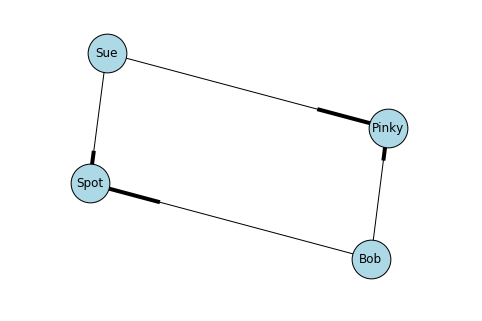

In [9]:
## Draw the graph
nx.draw(DG, with_labels=True, node_color="lightblue", node_size=1500)

## Nodes

In [10]:
## Access a graph's nodes
DG.nodes()

['Pinky', 'Bob', 'Spot', 'Sue']

In [11]:
## For large graphs you may want to use an iterator
for node in DG.nodes_iter():
    print node

Pinky
Bob
Spot
Sue


### Node Attributes

In [12]:
## Add a node attribute
DG.node['Bob']['uid'] = 1

In [13]:
## Get a node's attribute dictionary
DG.node['Bob']

{'uid': 1}

In [14]:
## Add a node and its attributes at the same time
DG.add_node('Sue', uid=2)

In [15]:
DG.node['Sue']

{'uid': 2}

In [16]:
## Add node attributes from a dictionary
nx.set_node_attributes(DG, 'pet_type', {'Spot':'dog', 'Pinky':'mouse'})
nx.set_node_attributes(DG, 'pid', {'Spot':10, 'Pinky':11})
DG.node['Spot']

{'pet_type': 'dog', 'pid': 10}

In [17]:
## Access nodes and their attributes
DG.nodes(data=True)

[('Pinky', {'pet_type': 'mouse', 'pid': 11}),
 ('Bob', {'uid': 1}),
 ('Spot', {'pet_type': 'dog', 'pid': 10}),
 ('Sue', {'uid': 2})]

In [18]:
## Access node attributes for the entire graph
nx.get_node_attributes(DG, 'uid')

{'Bob': 1, 'Sue': 2}

In [19]:
## Access a node's adjacency dictionary (edges and edge attributes)
DG['Bob']

{'Pinky': {}, 'Spot': {}}

## Edges

In [20]:
## Get all edges in the graph
DG.edges()

[('Bob', 'Pinky'), ('Bob', 'Spot'), ('Sue', 'Pinky'), ('Sue', 'Spot')]

In [21]:
## Edges iterator
for n1, n2 in DG.edges_iter():
    print n1, "connected to", n2

Bob connected to Pinky
Bob connected to Spot
Sue connected to Pinky
Sue connected to Spot


### Edge Attributes

In [22]:
## Add an edge attribute
DG.edge['Bob']['Pinky']['relationship'] = 'owns'

In [23]:
DG.edge['Bob']['Pinky']

{'relationship': 'owns'}

In [24]:
## Add an edge and its attributes at the same time
DG.add_edge('Bob', 'Spot', relationship='owns')

In [25]:
## Add edge attributes from a dictionary
nx.set_edge_attributes(DG, 'relationship', {('Sue', 'Pinky'):'owns', ('Sue', 'Spot'):'owns'})

In [26]:
DG.edges(data=True)

[('Bob', 'Pinky', {'relationship': 'owns'}),
 ('Bob', 'Spot', {'relationship': 'owns'}),
 ('Sue', 'Pinky', {'relationship': 'owns'}),
 ('Sue', 'Spot', {'relationship': 'owns'})]

In [27]:
nx.get_edge_attributes(DG, 'relationship')

{('Bob', 'Pinky'): 'owns',
 ('Bob', 'Spot'): 'owns',
 ('Sue', 'Pinky'): 'owns',
 ('Sue', 'Spot'): 'owns'}

## Drawing Graphs

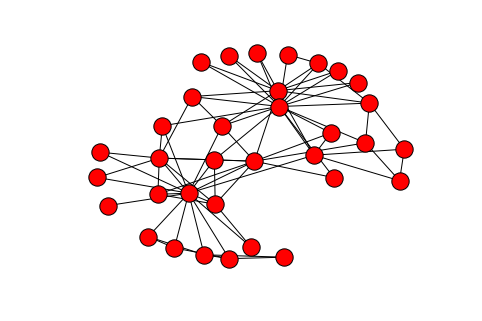

In [28]:
## Load an example graph
KG=nx.karate_club_graph()
nx.draw(KG)

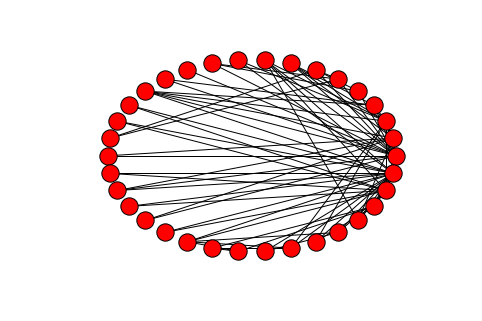

In [29]:
## Try out some different drawing algorithms
#nx.draw_random(KG)
#nx.draw_circular(KG)
#nx.draw_spectral(KG)
#nx.draw_spring(KG)
nx.draw_shell(KG)

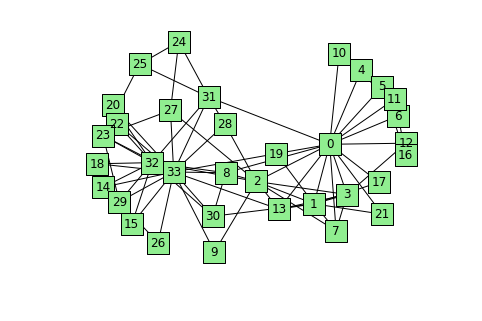

In [30]:
## Change the appearance of the nodes
nx.draw(KG, with_labels=True, node_color='lightgreen', node_size=500, node_shape='s')

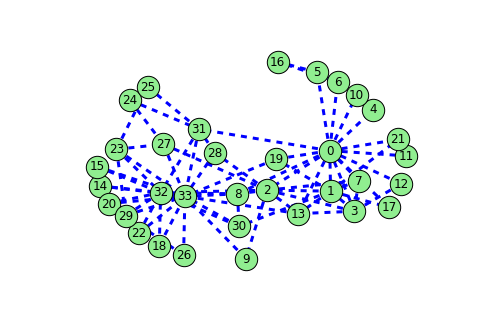

In [31]:
## Change the appearance of the edges
nx.draw(KG, with_labels=True, node_color='lightgreen', node_size=500, width=3, edge_color='blue', style='dashed')

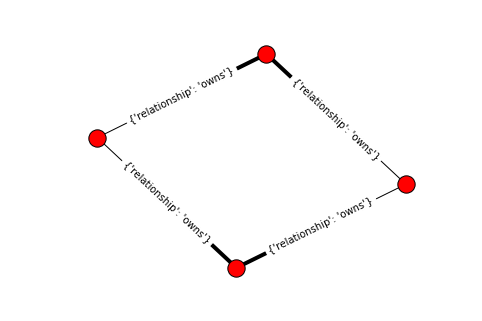

In [32]:
## Draw edge labels
## First get node positions and draw the graph
pos = nx.spring_layout(DG)
nx.draw(DG, pos)
## Use the default labels
edge_labels = nx.draw_networkx_edge_labels(DG, pos)

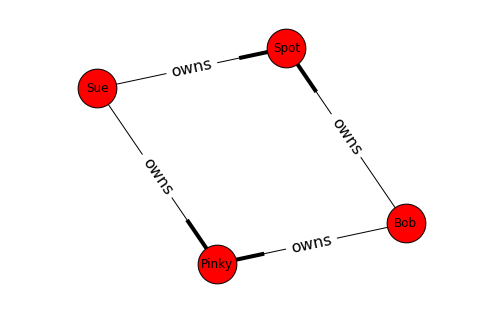

In [33]:
## Change the edge label appearance
pos = nx.spring_layout(DG)
nx.draw(DG, pos, node_size=1500, with_labels=True)
## Use a specific edge attribute for the labels
e_labels = nx.get_edge_attributes(DG, 'relationship')
edge_labels = nx.draw_networkx_edge_labels(DG, pos, edge_labels=e_labels, font_size=16)

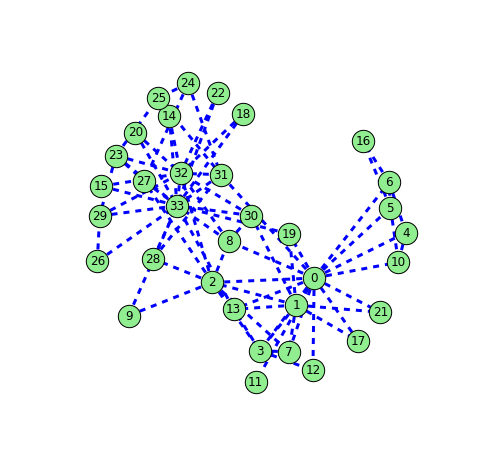

In [34]:
## Save a figure to file
fig = plt.figure(figsize=(6,6))
nx.draw(KG, with_labels=True, node_color='lightgreen', node_size=500, width=3, edge_color='blue', style='dashed')
plt.savefig("karate_graph.png", format="PNG")

## Analyzing Graphs

In [35]:
## How many nodes are in the pet ownership graph?
DG.number_of_nodes()

4

In [36]:
## Get the number of edges in the pet ownership graph
DG.number_of_edges()

4

### Graph Theory Measures

A number of measures have been devised to provide information about the properties of a graph.

#### Degree (Number of Edges)

In [37]:
## Get the number of edges for each node
DG.degree()

{'Bob': 2, 'Pinky': 2, 'Spot': 2, 'Sue': 2}

In [38]:
## For directed graphs you can also get the number of incoming
## and outgoing edges
DG.in_degree()

{'Bob': 0, 'Pinky': 2, 'Spot': 2, 'Sue': 0}

In [39]:
DG.out_degree()

{'Bob': 2, 'Pinky': 0, 'Spot': 0, 'Sue': 2}

In [40]:
## Get a node's neighbors
DG.neighbors('Bob')

['Pinky', 'Spot']

In [41]:
## You can also get a node's neighbors by accessing
## the adjacency dictionary
DG['Bob']

{'Pinky': {'relationship': 'owns'}, 'Spot': {'relationship': 'owns'}}

#### Centrality

Centrality is a measure of "importance" in a network. These types of measures were first developed for the analysis of social networks. NetworkX has implemented a number of measures for centrality.

In [42]:
## Degree centrality measures the proportion of nodes 
## connected to a particular node
nx.degree_centrality(DG)

{'Bob': 0.6666666666666666,
 'Pinky': 0.6666666666666666,
 'Spot': 0.6666666666666666,
 'Sue': 0.6666666666666666}

In [43]:
nx.degree_centrality(KG)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [44]:
## Betweenness centrality measures the number of times a node 
## is part of the shortest path between two other nodes
nx.betweenness_centrality(KG)

{0: 0.4376352813852815,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976907,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.304074975949976}

#### Clustering Coefficient

In [45]:
## Clustering measures are defined only for undirected graphs
## The clustering coefficent measures the connectedness of a
## node's neighbors
nx.clustering(KG)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0.0,
 10: 0.6666666666666666,
 11: 0.0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

#### Connected Components

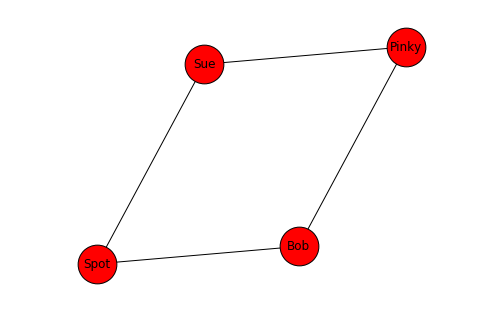

In [46]:
## Create an undirected graph
G = nx.Graph()
G.add_nodes_from(DG.nodes())
G.add_edges_from(DG.edges())
nx.draw(G, with_labels=True, node_size=1500)

In [47]:
## Check if the graph is connected
nx.is_connected(G)

True

In [48]:
## Add another component to the graph
G.add_nodes_from(['Jane', 'Snowball'])
G.add_edge('Jane', 'Snowball', relationship='owns')
nx.is_connected(G)

False

In [49]:
list(nx.connected_components(G))

[{'Bob', 'Pinky', 'Spot', 'Sue'}, {'Jane', 'Snowball'}]

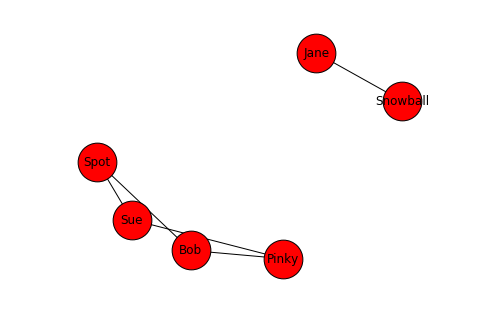

In [50]:
nx.draw(G, with_labels=True, node_size=1500)

## Intro to Graph Algorithms


### Graph Traversal

Graph traversal is the processing of following the edges of a graph and visiting each node according to a particular set of rules. Graph traversal algorithms can be applied to number of problems in graph theory, such as determining connected components and finding paths between two nodes. We will discuss the "Depth-first Search" and "Breadth-first Search" algorithms in the next lecture.

### Connected Components

As mentioned, graph traversal algorithms can be used to determine if a graph is connected. If a traversal visits all nodes in the graph, the graph is connected.

In [51]:
nx.is_connected(KG)

True

### Paths

Finding the shortest path between two nodes (or between all pairs of nodes) is a common problem in graph analysis. The path length can be defined as the number of edges in the path, or the sum of values assigned to each edge (edge weights) in the path. A number of algorithms address this problem:

[http://en.wikipedia.org/wiki/Shortest_path_problem](http://en.wikipedia.org/wiki/Shortest_path_problem)

In [52]:
nx.has_path(KG, 1, 20)

True

In [53]:
path = nx.shortest_path(KG, 1, 20)
path

[1, 2, 32, 20]

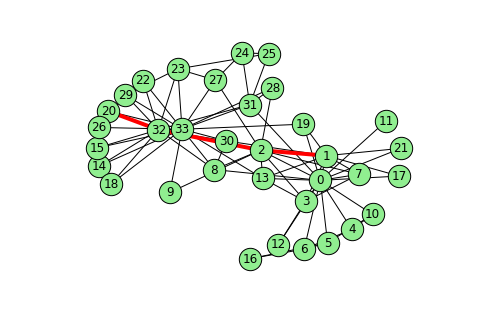

In [54]:
edge_list = [(path[i], path[i+1]) for i in range(len(path)-1)]
pos2 = nx.spring_layout(KG)
nx.draw(KG, pos2, with_labels=True, node_color='lightgreen', node_size=500)
edge_format = nx.draw_networkx_edges(KG, pos2, edgelist=edge_list, width=4, edge_color='red')

## In-Class Exercises

In [ ]:
## Exercise 1.
## Create a module that contains a function for 
## creating a random graph of a specified size
## 
## How would you import and use this module?
##
    

In [ ]:
## Exercise 2.
## Write a function for counting the number of neighbors
## for each node in a graph. Return the results as a dictionary.
##

## References
- [http://networkx.github.io/documentation/latest/index.html](http://networkx.github.io/documentation/latest/index.html)

#### Last Updated: 22-Sep-2016